In [31]:
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from helpers import *

# Data import and cleaning

In [7]:
(yb_t, input_data_t, ids_t) = load_csv_data('data/train.csv', sub_sample = True)
(yb_test, input_data_test, ids_test) = load_csv_data('data/test.csv',sub_sample = True)

In [47]:
input_clean = clean_data(input_data_t)
test_clean = clean_data(input_data_test)

In [9]:
n_features = len(input_data_t[0,:])
n_points = len(input_data_t)

print(n_features)
print(n_points)

30
5000


# Feature Processing
Eleminate data points where incomplete feature

In [10]:
input_without_point = input_clean[~np.isnan(input_clean).any(axis =1)]
yb_without_point = yb_t[~np.isnan(input_clean).any(axis =1)]
print(len(input_without_point))
print(len(yb_without_point))

1369
1369


In [38]:
def least_squares_SGD(
        y, tx, initial_w, max_iters, gamma):
    """Stochastic gradient descent."""
    # Use the standard mini-batch-size 1
    batch_size = 1
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
            
    return ws[-1], losses


In [45]:
(w, loss) = least_squares_SGD(yb_without_point, input_without_point, np.zeros((n_features,)), 10000, 0.00000001)

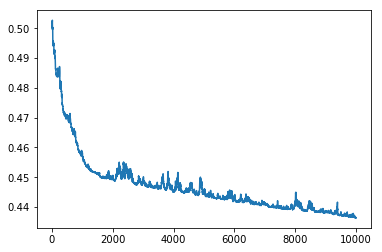

In [46]:
plt.plot(loss)
plt.show()